## HTML 데이터 파싱을 이용한 크롤링
- 네이버 연관검색어 수집
    - 1. 웹페이지 분석 : URL 찾기
    - 2. 요청 -> 응답 : HTML(str)
    - 3. HTML(str) -> BeautifulSoup obj (css-selector 사용)로 파싱 -> DataFrame

### 웹페이지 분석 : URL

In [2]:
query = '삼성전자'
url ='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={}'.format(query)
print(url)

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=삼성전자


### Request -> Response : HTML(str)

In [3]:
response = requests.get(url)
response

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="삼성전자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <title>삼성전자 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210114.css"> <link rel="stylesheet" type="text/css" 
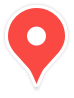

In [4]:
response.text

### HTML(str)  -> BeautifulSoup Obj (css-selector) -> DF

<class 'bs4.BeautifulSoup'>



<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/>  <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="삼성전자 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'삼성전자'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'삼성전자'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>삼성전자 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/>  <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210114.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/s
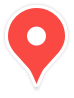

In [6]:
doc = BeautifulSoup(response.text, 'html5lib')
print(type(doc))
print()
doc

#### beautifulsoup 객체 메서드
- select : 여러개의 element 객체를 리스트로 가져옴
- select_one : 하나의 element 객체를 가져옴
- 크롬에서 찾고자 하는 태그 우클릭 -> copy -> copy selector
    - #nx_right_related_keywords > div > div.related_srch > ul

In [11]:
# lst_related_src 클래스 아래 li 태그들 찾기
elements = doc.select('.lst_related_srch > li')
len(elements)

10

In [13]:
type(elements[0])

bs4.element.Tag

In [17]:
keywords = []
for element in elements:
    keywords.append(element.text.strip())
keywords

['삼성전자우',
 '현대자동차',
 '코스피',
 '삼성',
 '셀트리온',
 '현대차',
 '카카오',
 '삼성전자 주가',
 'lg전자',
 '대한항공']

In [19]:
keywords = [element.text.strip() for element in elements]
keywords

['삼성전자우',
 '현대자동차',
 '코스피',
 '삼성',
 '셀트리온',
 '현대차',
 '카카오',
 '삼성전자 주가',
 'lg전자',
 '대한항공']

In [30]:
# 함수로 만들기
def naver_relational_keywords(query):
    url ='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={}'.format(query)
    response = requests.get(url)
    doc = BeautifulSoup(response.text, 'html5lib')
    elements = doc.select('.lst_related_srch > li')
    elements = [element.text.strip() for element in elements]
    return pd.DataFrame(np.array(elements).reshape(-1,1), columns=[query])


In [35]:
query='무야호'
naver_relational_keywords(query)

,무야호
0,무야호 뜻
1,무야호 나무위키
2,무한도전 김상덕
3,그만큼 신나시는거지
4,무한도전 무야호
5,무지몽매
6,무야호 할아버지


## 다음 뉴스 데이터
- 다음 뉴스의 메인 페이지 15개 기사의 제목, 링크 내용 수집

In [36]:
# 1. URL
url = 'https://media.daum.net/'

In [37]:
# 2. HTML(str)
response = requests.get(url)
response

<Response [200]>

In [38]:
# 3. BS
doc = BeautifulSoup(response.text, 'html5lib')

<!DOCTYPE html>
<html class="os_unknown none unknown version_0" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="always" name="referrer"/>

<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="홈" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>

<title>홈 | 다음뉴스</title>

<meta content="IE=edge" http-equiv="X-UA-Compatible"/>

<link href="//t1.daumcdn.net/media/kraken/news/7f917de/common.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/7f917de/news.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/7f917de/calendar.css.merged.css" rel="stylesheet" type="text/css"/>

<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc

In [39]:
elements = doc.select('.list_headline > li')
len(elements)

15

In [49]:
elements[0].select_one('a').get('href')

'https://news.v.daum.net/v/20210121164402600'

In [60]:
datas =[]

for element in elements:
    datas.append({
        'title':element.select_one('.tit_g').text.strip().replace('\n','').replace('\t',''),
        'link':element.select_one('a')['href']
    })
    
articles_df = pd.DataFrame(datas)
articles_df

,title,link
0,준공 후 15년간 사용 못 한 안산시 도로..3월 늑장개통 예정,https://news.v.daum.net/v/20210121164402600
1,LG전자 휴대폰 인력 AI에 우선 배치..車 전장 함께 키운다 ...,https://news.v.daum.net/v/20210121163945447
2,"성비위 교사 5~10년 담임 금지법 논란..""성범죄 장려하냐"" 뉴시스",https://news.v.daum.net/v/20210121163621331
3,올 들어 6.5조 내던진 국민연금..국내주식 비중 축소 놓고 논란 ...,https://news.v.daum.net/v/20210121163503270
4,與野 모처럼 손잡나..소상공인 손실보상 법제화 '급물살' 이데일리,https://news.v.daum.net/v/20210121163432263
5,"""해외성매매 남편에 성병 옮아""..80대 시모 머리채 잡고 분풀이",https://news.v.daum.net/v/20210121164247553
6,'만능통장' ISA 인기 갈수록 시들.. 문턱 낮췄지만 반등은 글쎄 ...,https://news.v.daum.net/v/20210121163317215
7,"호황 맞은 컨테이너선 시장..""올해 물동량, 코로나 전 수준 회복할 것"" ...",https://news.v.daum.net/v/20210121163218155
8,"역대최악 한일관계인데..외교부 ""안정적으로 관리"" 이데일리",https://news.v.daum.net/v/20210121163041077
9,1兆개 '센서 시대' 준비..美日 추격 R&D 투자전략 수립 뉴시스,https://news.v.daum.net/v/20210121163019057


In [63]:
# content 데이터 추가

link = articles_df.loc[0, 'link']
print(link)

https://news.v.daum.net/v/20210121164402600


In [64]:
response = requests.get(link)
doc = BeautifulSoup(response.text, 'html5lib')
doc

<!DOCTYPE html>
<html lang="ko"><head data-cloud-area="head"> 
  <meta charset="utf-8"/> 
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/> 
  <style>
            @import url('//t1.daumcdn.net/harmony_static/cloud/page/87ab3fb9e1beb71d37e9c426aedd10e7850e60fb.css');
            @import url('//t1.daumcdn.net/harmony_static/cloud/2020/12/02/common.ae516f46c0a95bbc9fd0.css')
        </style> 
  <style>
            /* 다음 카페 소셜 쉐어 임시 비활성화 */
            .list_sns li:nth-child(6) {
                display: none;
            }
        </style> 
  <meta content="noindex" name="robots"/> 
  <meta content="c4TtrEPZsm" property="mccp:docId"/> 
  <meta content="다음뉴스" property="og:site_name"/> 
  <meta content="준공 후 15년간 사용 못 한 안산시 도로..3월 늑장개통 예정" property="og:title"/> 
  <meta content="20210121164402" property="og:regDate"/> 
  <meta content="article" property="og:type"/> 
  <meta content="https://news.v.daum.net/v/c4TtrEPZsm" property="og:url"/> 
  <meta content="https://img1.daumcdn.net/t

In [69]:
doc.select_one('#harmonyContainer').text.strip().replace('\n', '')

'(안산=연합뉴스) 김광호 기자 = 2006년 개설 준공된 경기 안산시의 한 도로가 15년 만에 늑장 개통될 전망이다.          안산시는 21일 "개설해 놓고도 15년간 개통하지 못했던 상록구 사동 해양로 535ｍ 구간을 늦어도 오는 3월 이전 개통할 예정"이라고 밝혔다.          이 도로는 한국수자원공사가 이 일대 신도시를 조성하면서 70여억원을 들여 개설한 1천150ｍ 중 일부 구간이다.                                            15년째 개통 못 하고 있는 안산시 도로 [촬영=김광호 기자]                               시는 수자원공사가 도로를 준공한 뒤 기부채납 받아 LPG충전소 삼거리에서 화성시와 경계에 있는 수노을교까지 615ｍ를 개통했으나 나머지 구간을 지금까지 개통하지 못했다.          수자원공사가 시화멀티테크노밸리(MTV) 관련 광역교통개선대책의 일환으로 새로운 도로를 개설한 뒤 이 도로와 접속하려는 계획을 추진하자 당시 인근 아파트단지 주민들이 "당초 없던 도로개설 계획인 만큼 환경영향평가 등을 다시 실시해야 한다"며 개통에 반대했기 때문이다.          수자원공사의 신설 도로 계획은 2012년 백지화됐으나 이후에도 해당 도로 인근이 개발되지 않아 민원제기가 없자 개통은 지금까지 미뤄져 왔다고 시는 밝혔다.          하지만 2018년 하천을 사이에 두고 화성시 새솔동에 신도시가 조성된데다가 인근 안산지역에도 지난해 7천여 가구가 넘는 대규모 아파트단지가 들어서면서 이 도로를 개통해야 한다는 민원이 이어지자 시가 개통 작업에 나선 것이다.          당초 개통에 반대했던 해당 아파트 주민들은 주민의 동의가 없었고, 교통체증 및 학생들의 등하굣길 안전사고 우려가 크다는 등의 이유를 들어 여전히 개통에 반대하고 있는 것으로 알려졌다.          시는 주민들의 우려를 해소하기 위해 개통 전 어린이보호구역 지정과 교통안전시설 등을 추가 설치하고, 개통

In [72]:
def get_content(link):
    response = requests.get(link)
    doc = BeautifulSoup(response.text, 'html5lib')
    return doc.select_one('#harmonyContainer').text.strip().replace('\n','')

In [74]:
articles_df['content'] = articles_df['link'].apply(get_content)
articles_df

,title,link,content
0,준공 후 15년간 사용 못 한 안산시 도로..3월 늑장개통 예정,https://news.v.daum.net/v/20210121164402600,(안산=연합뉴스) 김광호 기자 = 2006년 개설 준공된 경기 안산시의 한 도로가 ...
1,LG전자 휴대폰 인력 AI에 우선 배치..車 전장 함께 키운다 ...,https://news.v.daum.net/v/20210121163945447,LG전자가 휴대폰 사업 매각을 공식화한 가운데 해당 사업부 인력을 AI(인공지능) ...
2,"성비위 교사 5~10년 담임 금지법 논란..""성범죄 장려하냐"" 뉴시스",https://news.v.daum.net/v/20210121163621331,【서울=뉴시스】김병문 기자 = 정치하는엄마들이 14일 오후 서울 서초구 서울중앙지방...
3,올 들어 6.5조 내던진 국민연금..국내주식 비중 축소 놓고 논란 ...,https://news.v.daum.net/v/20210121163503270,국민연금이 포함된 연기금이 올 들어 국내 주식시장에서 6조원 넘게 내다 팔고 있다....
4,與野 모처럼 손잡나..소상공인 손실보상 법제화 '급물살' 이데일리,https://news.v.daum.net/v/20210121163432263,[이데일리 박태진 기자] 코로나19 여파로 인해 정부의 영업제한 조치가 장기화하면서...
5,"""해외성매매 남편에 성병 옮아""..80대 시모 머리채 잡고 분풀이",https://news.v.daum.net/v/20210121164247553,© News1 DB (대전=뉴...
6,'만능통장' ISA 인기 갈수록 시들.. 문턱 낮췄지만 반등은 글쎄 ...,https://news.v.daum.net/v/20210121163317215,2016년 3월 출시 이후 ‘절세(節稅) 만능통장’으로 불리며 한때 가입 열풍이 불...
7,"호황 맞은 컨테이너선 시장..""올해 물동량, 코로나 전 수준 회복할 것"" ...",https://news.v.daum.net/v/20210121163218155,[이데일리 경계영 기자] 지난해 하반기 실어나를 컨테이너가 몰리면서 급등했던 컨테이...
8,"역대최악 한일관계인데..외교부 ""안정적으로 관리"" 이데일리",https://news.v.daum.net/v/20210121163041077,문재인 대통령이 지난해 9월 24일 청와대에서 스가 요시히데(菅義偉) 일본 총리와 ...
9,1兆개 '센서 시대' 준비..美日 추격 R&D 투자전략 수립 뉴시스,https://news.v.daum.net/v/20210121163019057,[서울=뉴시스]최기영 과학기술정보통신부 장관이 8일 오후 서울 강남구 한국과학기술회...
